In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

# Load the data
file_path = 'dht22.csv'
data = pd.read_csv(file_path)

In [2]:
# Define the quantiles for filtering out the top 5% and bottom 5% of temperature values
low_quantile = data['Temperature (°C)'].quantile(0.05)
high_quantile = data['Temperature (°C)'].quantile(0.95)

In [3]:
# Filter the data
filtered_data = data[(data['Temperature (°C)'] > low_quantile) & (data['Temperature (°C)'] < high_quantile)]

In [4]:
# Prepare the filtered data for training
X_filtered = filtered_data['Temperature (°C)'].values.reshape(-1, 1)
y_filtered = filtered_data['Humidity (%)'].values

In [5]:
# Re-train the Linear Regression model with the filtered data
model_filtered = LinearRegression()
model_filtered.fit(X_filtered, y_filtered)

LinearRegression()

In [6]:
# Predict humidity for the same test temperature values with the filtered model
min_temp, max_temp = X_filtered.min(), X_filtered.max()
test_temps = np.linspace(min_temp, max_temp, 100).reshape(-1, 1)
predicted_humidity_filtered = model_filtered.predict(test_temps)

In [24]:
fig = px.scatter(data, x="Temperature", y="Humidity", opacity = 0.65, title = "Temperature vs Humidity First Comparison")
fig.add.traces(go.Scatter(x=x

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Timestamp', 'Temperature (°C)', 'Humidity (%)'] but received: Temperature

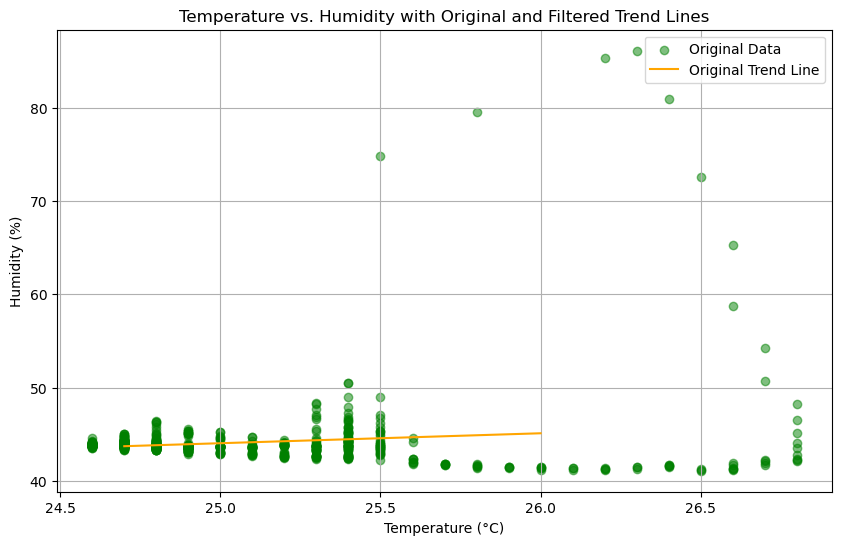

In [17]:
# Load the original data
data = pd.read_csv(file_path)

# Prepare the original data for training
X_original = data['Temperature (°C)'].values.reshape(-1, 1)
y_original = data['Humidity (%)'].values

# Train the Linear Regression model with the original data
model_original = LinearRegression()
model_original.fit(X_original, y_original)

# Predict humidity for the same test temperature values with the original model
predicted_humidity_original = model_original.predict(test_temps)

# Plot the original data, original trend line, filtered trend line, and further filtered trend line
plt.figure(figsize=(10, 6))

# Plot original data and trend line
plt.scatter(X_original, y_original, color='green', label='Original Data', alpha=0.5)
plt.plot(test_temps, predicted_humidity_original, color='orange', linestyle='-', label='Original Trend Line')

plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity with Original and Filtered Trend Lines')
plt.legend()
plt.grid(True)
plt.show()


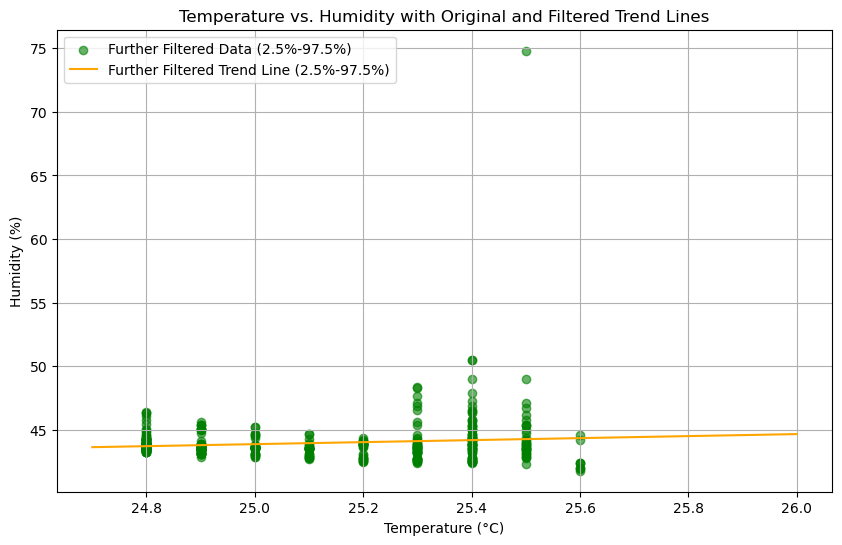

In [19]:
# Predict humidity for the same test temperature values with the original model
predicted_humidity_original = model_original.predict(test_temps)

# Plot the original data, original trend line, filtered trend line, and further filtered trend line
plt.figure(figsize=(10, 6))

# Plot further filtered data and trend line
plt.scatter(X_further_filtered, y_further_filtered, color='green', label='Further Filtered Data (2.5%-97.5%)', alpha=0.6)
plt.plot(test_temps, predicted_humidity_further_filtered, color='orange', label='Further Filtered Trend Line (2.5%-97.5%)')

plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity with Original and Filtered Trend Lines')
plt.legend()
plt.grid(True)
plt.show()
